# Loading Data

In [1]:
file=open("Royal_data.txt","r")
royal_data=file.readlines()
file.close()
print(royal_data)

['The future king is the prince\n', 'Daughter is the princess\n', 'Son is the prince\n', 'Only a man can be a king\n', 'Only a woman can be a queen\n', 'The princess will be a queen\n', 'The prince is a strong man\n', 'The princess is a beautiful woman\n', 'Prince is only a boy now\n', 'Prince will be king\n', 'A boy will be a man']


# Removing '\n' from the end of every sentence and convert the sentence into lowercase

In [2]:
for i in range(len(royal_data)):
    royal_data[i]=royal_data[i].lower().replace("\n","")
    
print(royal_data)

['the future king is the prince', 'daughter is the princess', 'son is the prince', 'only a man can be a king', 'only a woman can be a queen', 'the princess will be a queen', 'the prince is a strong man', 'the princess is a beautiful woman', 'prince is only a boy now', 'prince will be king', 'a boy will be a man']


# Removing stop words

In [3]:
stopwords = ["the","is","are","can","will","be","a","only","their","now","and","at","it"]

filtered_data=[]

for sentance in royal_data:
    temp=[]
    for word in sentance.split():
        if word not in stopwords:
            temp.append(word)
    filtered_data.append(temp)
print(filtered_data)

[['future', 'king', 'prince'], ['daughter', 'princess'], ['son', 'prince'], ['man', 'king'], ['woman', 'queen'], ['princess', 'queen'], ['prince', 'strong', 'man'], ['princess', 'beautiful', 'woman'], ['prince', 'boy'], ['prince', 'king'], ['boy', 'man']]


# Creating bigrams

In [4]:
bigrams=[]

for word_list in filtered_data:
    for i in range(len(word_list)-1):
        for j in range(i+1,len(word_list)):
            bigrams.append([word_list[i],word_list[j]])
            bigrams.append([word_list[j],word_list[i]])

print(bigrams)

[['future', 'king'], ['king', 'future'], ['future', 'prince'], ['prince', 'future'], ['king', 'prince'], ['prince', 'king'], ['daughter', 'princess'], ['princess', 'daughter'], ['son', 'prince'], ['prince', 'son'], ['man', 'king'], ['king', 'man'], ['woman', 'queen'], ['queen', 'woman'], ['princess', 'queen'], ['queen', 'princess'], ['prince', 'strong'], ['strong', 'prince'], ['prince', 'man'], ['man', 'prince'], ['strong', 'man'], ['man', 'strong'], ['princess', 'beautiful'], ['beautiful', 'princess'], ['princess', 'woman'], ['woman', 'princess'], ['beautiful', 'woman'], ['woman', 'beautiful'], ['prince', 'boy'], ['boy', 'prince'], ['prince', 'king'], ['king', 'prince'], ['boy', 'man'], ['man', 'boy']]


# Getting a list of unique words

In [5]:
all_words=[]

for sentances in filtered_data:
    all_words.extend(sentances)
    
all_words=list(set(all_words))
all_words.sort()

print(all_words)
print("Total no of unique words are:",len(all_words))

['beautiful', 'boy', 'daughter', 'future', 'king', 'man', 'prince', 'princess', 'queen', 'son', 'strong', 'woman']
Total no of unique words are: 12


# Creating dictionary of words

In [6]:
words_dict = {}
counter = 0

for word in all_words:
    words_dict[word] = counter
    counter += 1

print(words_dict)

{'beautiful': 0, 'boy': 1, 'daughter': 2, 'future': 3, 'king': 4, 'man': 5, 'prince': 6, 'princess': 7, 'queen': 8, 'son': 9, 'strong': 10, 'woman': 11}


# Performing one-hot encoding

In [7]:
import numpy as np

onehot_data =np.zeros((len(all_words), len(all_words)))

for i in range(len(all_words)):
    onehot_data[i][i]=1
    
# print(onehot_data)

onehot_dict={}

for i in range (len(all_words)):
    onehot_dict[all_words[i]]=onehot_data[i]
    
for word in onehot_dict:
    print(word,":",onehot_dict[word])


beautiful : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
boy : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
daughter : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
future : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
king : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
man : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
prince : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
princess : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
queen : [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
son : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
strong : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
woman : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [8]:
X=[]
Y=[]

for bi in bigrams:
    X.append(onehot_dict[bi[0]])
    Y.append(onehot_dict[bi[1]])

x=np.array(X)
y=np.array(Y)
x

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.,

In [9]:
len(onehot_data[0])

12

In [10]:
onehot_data.shape

(12, 12)

# Model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,SimpleRNN,Dropout,Input

In [40]:
vocal_size=len(onehot_data[0])
embed_size=7

model=Sequential()
model.add(Input(shape=(vocal_size)))
model.add(Dense(embed_size,activation="relu"))
model.add(Dense(vocal_size,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam")

In [41]:
# model = Sequential()

# model.add(Embedding(1000,12,input_length=12,name="embedding_layer"))

# model.add(Dense(128,activation="relu"))

# model.add(Dense(12, activation='softmax'))

# model.compile(loss="categorical_crossentropy",optimizer=optimizers.Adam(lr=0.005),metrics=["accuracy"])

In [42]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 7)                 91        
_________________________________________________________________
dense_14 (Dense)             (None, 12)                96        
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.fit(x,y,epochs=1000)

Train on 34 samples
Epoch 1/1000
34/34 [==============================] - 0s 10ms/sample - loss: 2.4348
Epoch 2/1000
34/34 [==============================] - 0s 280us/sample - loss: 2.4323
Epoch 3/1000
34/34 [==============================] - 0s 294us/sample - loss: 2.4303
Epoch 4/1000
34/34 [==============================] - 0s 296us/sample - loss: 2.4284
Epoch 5/1000
34/34 [==============================] - 0s 295us/sample - loss: 2.4265
Epoch 6/1000
34/34 [==============================] - 0s 304us/sample - loss: 2.4248
Epoch 7/1000
34/34 [==============================] - 0s 300us/sample - loss: 2.4231
Epoch 8/1000
34/34 [==============================] - 0s 262us/sample - loss: 2.4215
Epoch 9/1000
34/34 [==============================] - 0s 291us/sample - loss: 2.4199
Epoch 10/1000
34/34 [==============================] - 0s 294us/sample - loss: 2.4184
Epoch 11/1000
34/34 [==============================] - 0s 266us/sample - loss: 2.4169
Epoch 12/1000
34/34 [=======================

34/34 [==============================] - 0s 180us/sample - loss: 2.3103
Epoch 97/1000
34/34 [==============================] - 0s 361us/sample - loss: 2.3090
Epoch 98/1000
34/34 [==============================] - 0s 330us/sample - loss: 2.3076
Epoch 99/1000
34/34 [==============================] - 0s 223us/sample - loss: 2.3062
Epoch 100/1000
34/34 [==============================] - 0s 333us/sample - loss: 2.3048
Epoch 101/1000
34/34 [==============================] - 0s 279us/sample - loss: 2.3034
Epoch 102/1000
34/34 [==============================] - 0s 330us/sample - loss: 2.3020
Epoch 103/1000
34/34 [==============================] - 0s 299us/sample - loss: 2.3006
Epoch 104/1000
34/34 [==============================] - 0s 207us/sample - loss: 2.2992
Epoch 105/1000
34/34 [==============================] - 0s 305us/sample - loss: 2.2978
Epoch 106/1000
34/34 [==============================] - 0s 246us/sample - loss: 2.2964
Epoch 107/1000
34/34 [==============================] - 0s 19

34/34 [==============================] - 0s 176us/sample - loss: 2.1830
Epoch 191/1000
34/34 [==============================] - 0s 315us/sample - loss: 2.1817
Epoch 192/1000
34/34 [==============================] - 0s 218us/sample - loss: 2.1805
Epoch 193/1000
34/34 [==============================] - 0s 265us/sample - loss: 2.1791
Epoch 194/1000
34/34 [==============================] - 0s 324us/sample - loss: 2.1779
Epoch 195/1000
34/34 [==============================] - 0s 264us/sample - loss: 2.1764
Epoch 196/1000
34/34 [==============================] - 0s 264us/sample - loss: 2.1750
Epoch 197/1000
34/34 [==============================] - 0s 286us/sample - loss: 2.1734
Epoch 198/1000
34/34 [==============================] - 0s 341us/sample - loss: 2.1720
Epoch 199/1000
34/34 [==============================] - 0s 235us/sample - loss: 2.1706
Epoch 200/1000
34/34 [==============================] - 0s 296us/sample - loss: 2.1690
Epoch 201/1000
34/34 [==============================] - 0s

34/34 [==============================] - 0s 236us/sample - loss: 2.0446
Epoch 285/1000
34/34 [==============================] - 0s 234us/sample - loss: 2.0433
Epoch 286/1000
34/34 [==============================] - 0s 294us/sample - loss: 2.0418
Epoch 287/1000
34/34 [==============================] - 0s 177us/sample - loss: 2.0403
Epoch 288/1000
34/34 [==============================] - 0s 324us/sample - loss: 2.0390
Epoch 289/1000
34/34 [==============================] - 0s 267us/sample - loss: 2.0377
Epoch 290/1000
34/34 [==============================] - 0s 234us/sample - loss: 2.0363
Epoch 291/1000
34/34 [==============================] - 0s 301us/sample - loss: 2.0349
Epoch 292/1000
34/34 [==============================] - 0s 206us/sample - loss: 2.0334
Epoch 293/1000
34/34 [==============================] - 0s 324us/sample - loss: 2.0319
Epoch 294/1000
34/34 [==============================] - 0s 319us/sample - loss: 2.0304
Epoch 295/1000
34/34 [==============================] - 0s

34/34 [==============================] - 0s 265us/sample - loss: 1.9180
Epoch 379/1000
34/34 [==============================] - 0s 216us/sample - loss: 1.9168
Epoch 380/1000
34/34 [==============================] - 0s 295us/sample - loss: 1.9155
Epoch 381/1000
34/34 [==============================] - 0s 208us/sample - loss: 1.9145
Epoch 382/1000
34/34 [==============================] - 0s 291us/sample - loss: 1.9132
Epoch 383/1000
34/34 [==============================] - 0s 267us/sample - loss: 1.9121
Epoch 384/1000
34/34 [==============================] - 0s 206us/sample - loss: 1.9110
Epoch 385/1000
34/34 [==============================] - 0s 300us/sample - loss: 1.9098
Epoch 386/1000
34/34 [==============================] - 0s 187us/sample - loss: 1.9087
Epoch 387/1000
34/34 [==============================] - 0s 350us/sample - loss: 1.9075
Epoch 388/1000
34/34 [==============================] - 0s 298us/sample - loss: 1.9063
Epoch 389/1000
34/34 [==============================] - 0s

34/34 [==============================] - 0s 295us/sample - loss: 1.8158
Epoch 473/1000
34/34 [==============================] - 0s 323us/sample - loss: 1.8148
Epoch 474/1000
34/34 [==============================] - 0s 288us/sample - loss: 1.8137
Epoch 475/1000
34/34 [==============================] - 0s 235us/sample - loss: 1.8128
Epoch 476/1000
34/34 [==============================] - 0s 359us/sample - loss: 1.8118
Epoch 477/1000
34/34 [==============================] - 0s 353us/sample - loss: 1.8107
Epoch 478/1000
34/34 [==============================] - 0s 277us/sample - loss: 1.8097
Epoch 479/1000
34/34 [==============================] - 0s 248us/sample - loss: 1.8088
Epoch 480/1000
34/34 [==============================] - 0s 228us/sample - loss: 1.8078
Epoch 481/1000
34/34 [==============================] - 0s 206us/sample - loss: 1.8069
Epoch 482/1000
34/34 [==============================] - 0s 301us/sample - loss: 1.8060
Epoch 483/1000
34/34 [==============================] - 0s

34/34 [==============================] - 0s 368us/sample - loss: 1.7287
Epoch 567/1000
34/34 [==============================] - 0s 324us/sample - loss: 1.7278
Epoch 568/1000
34/34 [==============================] - 0s 203us/sample - loss: 1.7270
Epoch 569/1000
34/34 [==============================] - 0s 270us/sample - loss: 1.7261
Epoch 570/1000
34/34 [==============================] - 0s 280us/sample - loss: 1.7252
Epoch 571/1000
34/34 [==============================] - 0s 235us/sample - loss: 1.7242
Epoch 572/1000
34/34 [==============================] - 0s 276us/sample - loss: 1.7235
Epoch 573/1000
34/34 [==============================] - 0s 325us/sample - loss: 1.7226
Epoch 574/1000
34/34 [==============================] - 0s 280us/sample - loss: 1.7218
Epoch 575/1000
34/34 [==============================] - 0s 283us/sample - loss: 1.7209
Epoch 576/1000
34/34 [==============================] - 0s 306us/sample - loss: 1.7202
Epoch 577/1000
34/34 [==============================] - 0s

34/34 [==============================] - 0s 163us/sample - loss: 1.6560
Epoch 661/1000
34/34 [==============================] - 0s 265us/sample - loss: 1.6552
Epoch 662/1000
34/34 [==============================] - 0s 265us/sample - loss: 1.6545
Epoch 663/1000
34/34 [==============================] - 0s 235us/sample - loss: 1.6539
Epoch 664/1000
34/34 [==============================] - 0s 350us/sample - loss: 1.6531
Epoch 665/1000
34/34 [==============================] - 0s 230us/sample - loss: 1.6525
Epoch 666/1000
34/34 [==============================] - 0s 236us/sample - loss: 1.6518
Epoch 667/1000
34/34 [==============================] - 0s 265us/sample - loss: 1.6511
Epoch 668/1000
34/34 [==============================] - 0s 206us/sample - loss: 1.6503
Epoch 669/1000
34/34 [==============================] - 0s 364us/sample - loss: 1.6496
Epoch 670/1000
34/34 [==============================] - 0s 297us/sample - loss: 1.6490
Epoch 671/1000
34/34 [==============================] - 0s

34/34 [==============================] - 0s 176us/sample - loss: 1.5910
Epoch 755/1000
34/34 [==============================] - 0s 272us/sample - loss: 1.5903
Epoch 756/1000
34/34 [==============================] - 0s 235us/sample - loss: 1.5897
Epoch 757/1000
34/34 [==============================] - 0s 255us/sample - loss: 1.5890
Epoch 758/1000
34/34 [==============================] - 0s 315us/sample - loss: 1.5884
Epoch 759/1000
34/34 [==============================] - 0s 176us/sample - loss: 1.5880
Epoch 760/1000
34/34 [==============================] - 0s 285us/sample - loss: 1.5873
Epoch 761/1000
34/34 [==============================] - 0s 241us/sample - loss: 1.5867
Epoch 762/1000
34/34 [==============================] - 0s 209us/sample - loss: 1.5861
Epoch 763/1000
34/34 [==============================] - 0s 273us/sample - loss: 1.5854
Epoch 764/1000
34/34 [==============================] - 0s 265us/sample - loss: 1.5848
Epoch 765/1000
34/34 [==============================] - 0s

34/34 [==============================] - 0s 236us/sample - loss: 1.5334
Epoch 849/1000
34/34 [==============================] - 0s 244us/sample - loss: 1.5328
Epoch 850/1000
34/34 [==============================] - 0s 241us/sample - loss: 1.5322
Epoch 851/1000
34/34 [==============================] - 0s 216us/sample - loss: 1.5316
Epoch 852/1000
34/34 [==============================] - 0s 253us/sample - loss: 1.5310
Epoch 853/1000
34/34 [==============================] - 0s 291us/sample - loss: 1.5303
Epoch 854/1000
34/34 [==============================] - 0s 250us/sample - loss: 1.5297
Epoch 855/1000
34/34 [==============================] - 0s 384us/sample - loss: 1.5294
Epoch 856/1000
34/34 [==============================] - 0s 335us/sample - loss: 1.5288
Epoch 857/1000
34/34 [==============================] - 0s 312us/sample - loss: 1.5282
Epoch 858/1000
34/34 [==============================] - 0s 302us/sample - loss: 1.5277
Epoch 859/1000
34/34 [==============================] - 0s

34/34 [==============================] - 0s 235us/sample - loss: 1.4748
Epoch 943/1000
34/34 [==============================] - 0s 281us/sample - loss: 1.4742
Epoch 944/1000
34/34 [==============================] - 0s 184us/sample - loss: 1.4732
Epoch 945/1000
34/34 [==============================] - 0s 279us/sample - loss: 1.4723
Epoch 946/1000
34/34 [==============================] - 0s 262us/sample - loss: 1.4717
Epoch 947/1000
34/34 [==============================] - 0s 248us/sample - loss: 1.4713
Epoch 948/1000
34/34 [==============================] - 0s 411us/sample - loss: 1.4705
Epoch 949/1000
34/34 [==============================] - 0s 267us/sample - loss: 1.4697
Epoch 950/1000
34/34 [==============================] - 0s 207us/sample - loss: 1.4691
Epoch 951/1000
34/34 [==============================] - 0s 223us/sample - loss: 1.4685
Epoch 952/1000
34/34 [==============================] - 0s 239us/sample - loss: 1.4678
Epoch 953/1000
34/34 [==============================] - 0s

In [ ]:
weights=model.get_weights()[0]

word_embeddings={}

for word in all_words:
    word_embeddings[word]=weights[words_dict[word]]
    
#print(word_embeddings)

for word in all_words:
    print(word,":",word_embeddings[word])

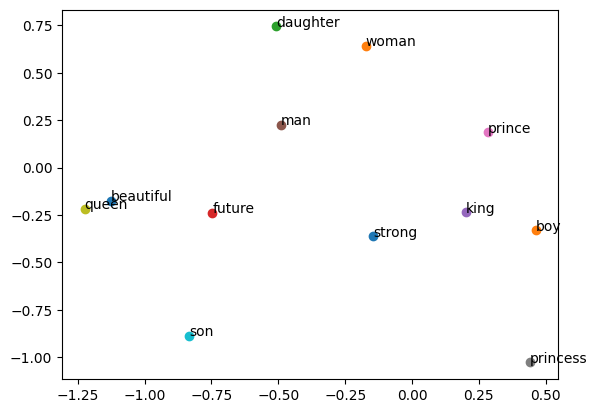

In [75]:
import matplotlib.pyplot as plt

for word in all_words:
    coordinates=word_embeddings[word]
    plt.scatter(coordinates[0],coordinates[1])
    plt.annotate(word,(coordinates[0],coordinates[1]))
    